# MATH 507 HW2
### Paul Zhang
## 0. Preperation

In [1]:
from hw2 import *
import matplotlib
import sys

In [2]:
print("Env info\nPython={}\nnumpy={}\npandas={}\nmatplotlib={}\nscipy={}\nyfinance={}".format(sys.version, \
        np.__version__, pd.__version__, matplotlib.__version__, scipy.__version__, yf.__version__))

Env info
Python=3.11.0 (main, Mar  1 2023, 12:33:14) [Clang 14.0.6 ]
numpy=1.26.4
pandas=2.2.2
matplotlib=3.9.2
scipy=1.12.0
yfinance=0.2.43


Additionally, let's get rid of the Future Warning from pandas. It's an eye sore.

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Part (a)
- DPP formula:
\begin{align*}
    V(t, w) &= \sup_\alpha \mathbb{E}[V(t + 1, w(1 + \alpha R_{t+1}))] \\
    V(T, w) &= \frac{w^\zeta}{\zeta}
\end{align*}
- Problem simplification:
Ansatz: $V(t, w) = C(t)w^\zeta$ with $C(T) = \frac{1}{\zeta}$. Therefore,
$$ C(t)w^\zeta = C(t + 1) w^\zeta\sup_\alpha \mathbb{E}[1 + \alpha R_{t + 1}]^\zeta $$
and we only need to maximize 
$$ \mathbb{E}[1 + \alpha R_{t + 1}]^\zeta $$
which is a function of $\alpha, \mu$ and $\epsilon$.

In [4]:
dt = yf.download(tickers = "^GSPC", start = "2014-01-01", end = "2022-01-01")
hyper_params = {"rf": .01, "zeta": -3, "N": 1000, "T": 100, "lambda_": .02, "grid": (-1, 2.5, 200)}
strategy = DynamicStrategy(price_data = dt["Adj Close"], log_returns = False, **hyper_params)
strategy.backtest()

[*********************100%***********************]  1 of 1 completed

Annualized mean, std dev and Sharpe Ratio: 
               mu     sigma    Sharpe
0       -0.001040  0.048829 -0.226088
0       -0.013839  0.013139 -1.814418
0        0.010748  0.080163  0.009327
0        0.015450  0.002515  2.166884
0       -0.012648  0.021324 -1.062071
0        0.099468  0.208551  0.428999
0        0.143545  0.059270  2.253180
0        0.007690  0.000976 -2.366960
0       -0.008748  0.007531 -2.489275
0       -0.034468  0.038305 -1.160894
0       -0.159719  0.047216 -3.594502
overall  0.021969  0.075489  0.158548


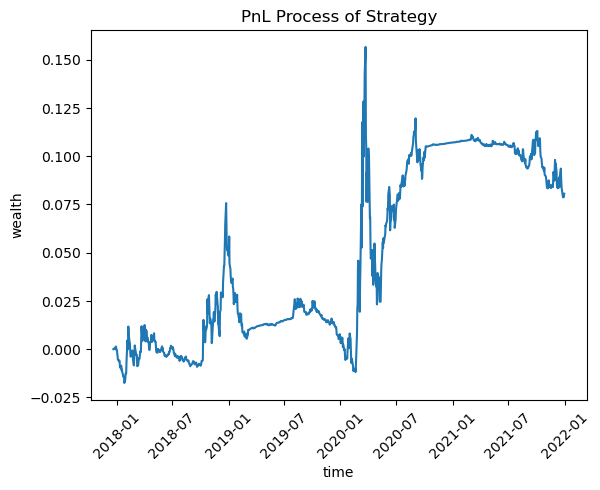

In [5]:
strategy.plot_pnl()

## Part (b)

In [6]:
strategy_tc = DynamicStrategyTC(price_data = dt["Adj Close"], log_returns = False, **hyper_params)
strategy_tc.backtest()

Annualized mean, std dev and Sharpe Ratio: 
               mu     sigma    Sharpe
0       -0.015155  0.048559 -0.518032
0       -0.017698  0.013159 -2.104893
0       -0.014488  0.080183 -0.305400
0        0.014864  0.002517  1.932024
0       -0.018211  0.021240 -1.328174
0        0.039221  0.208430  0.140195
0        0.133460  0.059442  2.076972
0        0.007458  0.000976 -2.605791
0       -0.010715  0.007546 -2.745146
0       -0.046530  0.038239 -1.478343
0       -0.175664  0.047575 -3.902517
overall -0.005211  0.075865 -0.200498


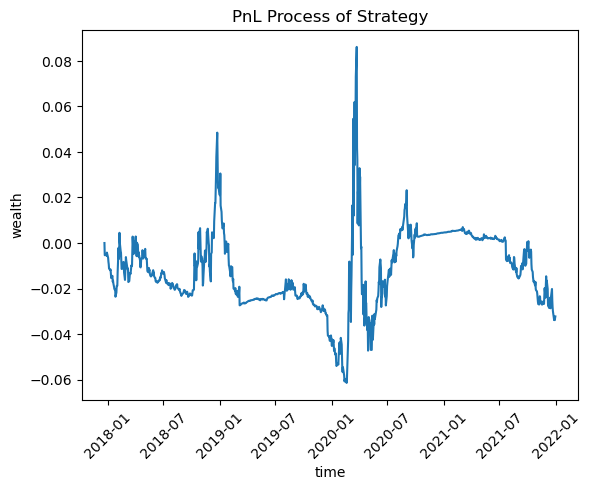

In [7]:
strategy_tc.plot_pnl()

## Part (c)
The model is given by
\begin{align*}
    V(t, a) &= \sup_{\alpha} \mathbb{E}\left[(1+\alpha(\mu+\epsilon)-\lambda|\alpha - a|)^\zeta \cdot V\left(t+1, \frac{\alpha(1+\mu+\epsilon)}{1 + (1-\alpha)r_f + \alpha(\mu+\epsilon)}\right)\right] \\
    V(T, a) &= \frac{1}{\zeta}
\end{align*}

In [8]:
strategy_grid = DynamicStrategyGrid(price_data = dt["Adj Close"], log_returns = False, **hyper_params)
strategy_grid.backtest()

Annualized mean, std dev and Sharpe Ratio: 
               mu     sigma    Sharpe
0        0.033837  0.156188  0.152616
0        0.135218  0.070154  1.784902
0        0.007831  0.207221 -0.010467
0        0.245252  0.108628  2.165674
0        0.154679  0.136372  1.060915
0       -0.208830  0.504677 -0.433603
0        0.473187  0.205685  2.251924
0        0.391589  0.161296  2.365763
0        0.314067  0.122211  2.488060
0        0.150926  0.121521  1.159682
0        0.601198  0.164528  3.593294
overall  0.156314  0.212350  0.689021


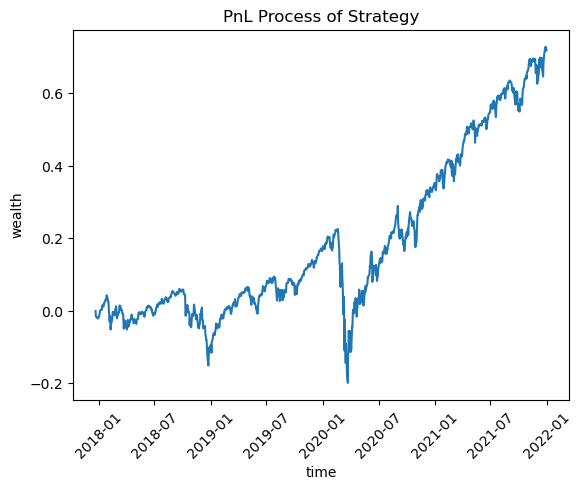

In [9]:
strategy_grid.plot_pnl()